In [0]:
from google.colab import drive 
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [2]:
# Importacion de bibliotecas

import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np
import random
import pandas as pd
import glob
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import scipy.stats as ss
from sklearn.svm import SVC


# Funciones 
def displaydf(dataframe, cols = None, rows = 54):
    with pd.option_context("display.max_columns", cols):
        with pd.option_context("display.max_rows", rows):
            display(dataframe)
    return True

    
#! git clone https://bitbucket.org/lidiiiaasanchez//content/drive/My Drive/Colab Notebooks.git
#import sys
#sys.path.append('/content/drive/My Drive/Colab Notebooks/funcionesSepsis.ipynb')
#from funcionesSepsis import *

In [16]:
# Cargamos fichero con los datos preprocesados
clean_patients = pd.read_csv("C:/Users/mgsanchez/Desktop/URJC/PMD/proyecto/loop1/CleanPatients_3.csv")
del clean_patients[("Unnamed: 0")] #Borramos columna extra 

In [17]:
# Visualizamos fichero
displaydf(clean_patients)

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,FiO2,pH,PaCO2,SaO2,AST,BUN,Alkalinephos,Calcium,Chloride,Creatinine,Bilirubin_direct,Glucose,Lactate,Magnesium,Phosphate,Potassium,Bilirubin_total,TroponinI,Hct,Hgb,PTT,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel,Outcome,IdPaciente
0,95.0,90.5,36.44,121.0,80.0,63.0,17.0,0.0,-3.000000,24.555556,1.000000,7.280000,49.000000,77.555556,0.0,11.444444,0.0,7.470000,109.555556,1.044444,0.0,99.000000,2.800000,2.233333,3.900000,4.266667,0.0,0.0,31.850000,13.038462,36.911111,7.900000,260.250,126.769231,27.92,1,0.0,0.0,-0.03,13,0,0,0
1,108.0,97.0,37.72,120.0,75.0,59.0,50.0,0.0,1.052632,31.608696,0.400000,7.429474,38.368421,78.347826,0.0,17.956522,0.0,7.804348,104.391304,1.300000,0.0,119.043478,1.300000,2.160870,2.573913,3.508696,0.0,0.0,26.560000,9.517391,32.121739,10.117391,470.500,89.956522,27.92,1,0.0,0.0,-0.03,71,0,0,0
2,117.0,100.0,38.11,145.0,88.0,67.0,26.0,0.0,1.800000,26.920000,0.400000,7.366000,48.400000,98.000000,0.0,20.720000,0.0,7.764000,105.720000,0.900000,0.0,125.080000,0.929630,2.036000,2.512000,3.856250,0.0,0.0,25.796000,8.844000,28.550000,8.416000,727.875,249.240000,27.92,1,0.0,0.0,-0.03,142,0,0,0
3,118.0,98.5,38.00,128.5,88.0,113.0,23.5,0.0,2.500000,27.760000,0.400000,7.362500,50.500000,98.000000,0.0,20.160000,0.0,7.792000,105.160000,0.900000,0.0,117.240000,0.886420,2.008000,2.736000,3.812500,0.0,0.0,25.488000,8.732000,28.300000,8.948000,753.250,281.720000,27.92,1,0.0,0.0,-0.03,149,0,0,0
4,113.0,100.0,37.61,113.5,68.0,61.0,34.0,0.0,3.000000,32.500000,1.000000,7.380000,50.000000,97.000000,0.0,18.500000,0.0,8.175000,103.500000,0.825000,0.0,142.000000,2.100000,1.850000,3.550000,3.900000,0.0,0.0,27.000000,8.900000,30.650000,10.475000,477.500,189.000000,27.92,1,0.0,0.0,-0.03,166,0,0,0
5,130.0,98.0,38.72,104.0,75.0,61.0,31.0,0.0,8.166667,34.090909,0.400000,7.421667,53.666667,97.000000,0.0,17.181818,0.0,8.063636,103.090909,0.800000,0.0,122.090909,1.100000,1.745455,3.309091,3.750000,0.0,0.0,26.572727,9.523529,25.055000,11.480000,477.500,242.400000,27.92,1,0.0,0.0,-0.03,176,0,0,0
6,119.0,95.0,38.44,96.0,74.0,62.0,30.0,0.0,8.000000,34.272727,0.400000,7.417500,54.250000,97.000000,0.0,17.545455,0.0,8.190909,103.272727,0.800000,0.0,126.272727,1.033333,1.836364,3.727273,3.650000,0.0,0.0,26.718182,9.370588,24.965000,11.840000,477.500,257.200000,27.92,1,0.0,0.0,-0.03,178,0,0,0
7,122.0,98.0,38.67,132.0,97.0,78.0,21.0,0.0,8.166667,34.636364,0.400000,7.411667,54.833333,97.000000,0.0,18.272727,0.0,8.445455,103.636364,0.800000,0.0,134.636364,1.166667,2.018182,4.563636,3.520000,0.0,0.0,27.009091,9.064706,24.785000,12.560000,477.500,286.800000,27.92,1,0.0,0.0,-0.03,182,0,0,0
8,114.0,100.0,37.78,118.0,88.0,69.0,44.0,0.0,9.000000,34.666667,0.400000,7.420000,54.000000,97.000000,0.0,19.333333,0.0,8.660000,104.222222,0.811111,0.0,141.666667,1.333333,2.186667,5.213333,3.566667,0.0,0.0,26.916667,8.682353,24.560000,13.460000,477.500,323.800000,27.92,1,0.0,0.0,-0.03,187,0,0,0
9,125.0,96.0,38.11,91.0,69.0,55.0,18.0,0.0,9.000000,33.333333,0.400000,7.452000,49.200000,97.000000,0.0,20.666667,0.0,8.500000,105.111111,0.855556,0.0,136.333333,1.466667,2.133333,4.466667,3.433333,0.0,0.0,25.383333,8.376471,24.380000,14.180000,477.500,353.400000,27.92,1,0.0,0.0,-0.03,191,0,0,0


True

# División en conjuntos train y test de los datos 

In [18]:
# Dividimos entre las variables que consideramos entradas y la salida

X = clean_patients[["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente"]]

y = clean_patients[["Outcome"]]

In [19]:
split_train_len=int(0.75*len(X)) #70% conjunto train

X_train=X.iloc[0:split_train_len,:]
X_test=X.iloc[split_train_len:,:]
y_train=y.iloc[0:split_train_len,:]
y_test=y.iloc[split_train_len:,:]

aux=clean_patients.iloc[0:split_train_len,:] #Auxiliar  


# Estandarización de los datos

In [20]:
scaler = preprocessing.StandardScaler().fit(X_train) #Estandarizamos los subconjuntos teniendo en cuenta que para el test usaremos la media y desviación tipica de train 

X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)

X_train_transformed_no_scaled_id=pd.DataFrame(X_train_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente"])

X_test_transformed_no_scaled_id=pd.DataFrame(X_test_scaler, columns=["HR", "O2Sat", "Temp", "SBP", "MAP","DBP", "Resp", "EtCO2", "BaseExcess", "HCO3", "FiO2", "pH", "PaCO2", "SaO2", 
                      "AST", "BUN", "Alkalinephos", "Calcium", "Chloride", "Creatinine", "Bilirubin_direct", "Glucose", "Lactate", 
                      "Magnesium", "Phosphate", "Potassium", "Bilirubin_total", "TroponinI", "Hct", "Hgb", "PTT", "WBC", "Fibrinogen",
                      "Platelets", "Age", "Gender", "Unit1", "Unit2", "HospAdmTime", "ICULOS", "IdPaciente"])


#Para evitar normalización de IdPaciente
X_train_transformed_no_id=X_train_transformed_no_scaled_id.iloc[:,0:40] #Incluimos las columnas estandarizadas salvo IdPaciente
X_train_id=X_train["IdPaciente"] #La guardamos aparte sin normalizar
X_train_transformed=X_train_transformed_no_id.join(X_train_id) #Juntamos las variables normalizadas más el IdPaciente original

X_test_transformed_no_id=X_test_transformed_no_scaled_id.iloc[:,0:40]
X_test_id=X_train["IdPaciente"]
X_test_transformed=X_test_transformed_no_id.join(X_train_id)

C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


# Búsqueda de parámetros libres óptimos

## Parámetro K

In [21]:
k_values = range(1,40,2) #Rango de valores de k
cv_k_scores=[] 

#Bucle para definir el paciente para validación
for i in range(len(X_train_transformed)/24):
    train_cross_val=X_train_transformed[X_train_transformed['IdPaciente']!=i] #Conjunto de pacientes train
    test_cross_val=X_train_transformed[X_train_transformed['IdPaciente']==i] #Paciente para conjunto de validacipn
    
    #Empleamos auxiliar para obtener posteriormente el IdPaciente asociado al Outcome
    patients_train_cross_val=aux[aux['IdPaciente']!=i] 
    y_train_cross_val=patients_train_cross_val['Outcome'] 
    patients_test_cross_val=aux[aux['IdPaciente']==i]
    y_test_cross_val=patients_test_cross_val['Outcome']
    
    #Construimos modelo
    k_scores=[]
    
    for f in k_values:
        neigh = KNeighborsClassifier(n_neighbors=f) #Van pasando los diferentes valores de k
        neigh.fit(train_cross_val,y_train_cross_val)
        score=neigh.score(test_cross_val,y_test_cross_val)
        k_scores.append(score) #Array con scores
    cv_k_scores.append(k_scores) #Array de arrays de scores

print(len(cv_k_scores), "arrays de", len(k_scores), "scores cada uno")

(18, 'arrays de', 20, 'scores cada uno')


[0.486111111111111, 0.47685185185185197, 0.5046296296296295, 0.5046296296296297, 0.4791666666666666, 0.48148148148148145, 0.49537037037037035, 0.5046296296296297, 0.5, 0.5092592592592592, 0.5162037037037037, 0.5046296296296295, 0.5231481481481481, 0.5277777777777778, 0.5300925925925926, 0.5208333333333333, 0.5092592592592592, 0.5, 0.5393518518518519, 0.5324074074074073]


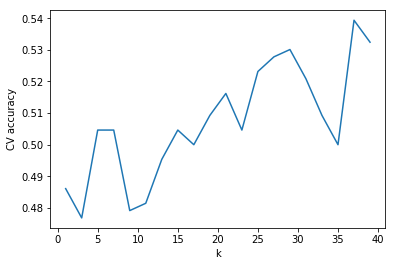

('El parametro k optimo es:', 37)


In [22]:
#Realizar la media de los scores obtenidos

k_mean_scores=[]

#Recorrer el array
for i in range(len(k_scores)):
    contador=0
    for j in range(len(cv_k_scores)):
        contador+=cv_k_scores[j][i]
        final_score=contador/len(cv_k_scores) #Media aritmetica
        
    k_mean_scores.append(final_score) 
print(k_mean_scores)
#Visualizacion
plt.plot(k_values, k_mean_scores)
plt.xlabel('k')
plt.ylabel('CV accuracy')
plt.show()

k_optimo = np.array(k_values)[k_mean_scores.index(np.array(k_mean_scores).max())]
print('El parametro k optimo es:', k_optimo)
        
    

In [23]:
display(X_train_transformed)
train_cross_val=X_train_transformed[X_train_transformed['IdPaciente']!='1']
#print(len(train_cross_val))

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,IdPaciente
0,-0.403466,-2.751373,-1.583955,-0.027979,0.044709,0.278230,-0.683017,0.0,-0.999302,-0.082673,...,-0.647393,0.470614,-0.697414,-1.540837,0.797724,-0.707107,0.0,0.498532,-0.886486,0
1,0.479224,-0.285412,0.470664,-0.079631,-0.311431,0.148183,4.519809,0.0,-0.084611,1.160798,...,-0.237488,1.372092,-0.907473,-1.540837,0.797724,-0.707107,0.0,0.498532,0.300041,0
2,1.090317,0.852724,1.096681,1.211689,0.614531,0.408276,0.735936,0.0,0.084072,0.334179,...,-0.552006,2.475626,0.001421,-1.540837,0.797724,-0.707107,0.0,0.498532,1.752515,0
3,1.158217,0.283656,0.920112,0.359417,0.614531,1.903807,0.341782,0.0,0.242064,0.482272,...,-0.453661,2.584425,0.186757,-1.540837,0.797724,-0.707107,0.0,0.498532,1.895716,0
4,0.818720,0.852724,0.294096,-0.415375,-0.810026,0.213207,1.997227,0.0,0.354915,1.317935,...,-0.171381,1.402106,-0.342317,-1.540837,0.797724,-0.707107,0.0,0.498532,2.243492,0
5,1.973008,0.093966,2.075836,-0.906076,-0.311431,0.213207,1.524242,0.0,1.521046,1.598413,...,0.014403,1.402106,-0.037609,-1.540837,0.797724,-0.707107,0.0,0.498532,2.448066,0
6,1.226116,-1.044169,1.626388,-1.319299,-0.382658,0.245718,1.366581,0.0,1.483429,1.630468,...,0.080952,1.402106,0.046842,-1.540837,0.797724,-0.707107,0.0,0.498532,2.488980,0
7,1.429814,0.093966,1.995577,0.540202,1.255582,0.765903,-0.052371,0.0,1.521046,1.694577,...,0.214050,1.402106,0.215744,-1.540837,0.797724,-0.707107,0.0,0.498532,2.570810,0
8,0.886620,0.852724,0.566975,-0.182937,0.614531,0.473299,3.573840,0.0,1.709132,1.699919,...,0.380424,1.402106,0.426871,-1.540837,0.797724,-0.707107,0.0,0.498532,2.673097,0
9,1.633511,-0.664791,1.096681,-1.577563,-0.738798,0.018137,-0.525355,0.0,1.709132,1.464852,...,0.513522,1.402106,0.595773,-1.540837,0.797724,-0.707107,0.0,0.498532,2.754926,0


C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


## Parámetros min_samples_leaf y max_depth

# Construcción de modelos

## KNN

In [24]:
#Generamos el modelo
neigh = KNeighborsClassifier(n_neighbors=k_optimo)
neigh.fit(X_train_transformed, y_train)
pred_neigh = neigh.predict(X_test_transformed)

C:\Users\mgsanchez\AppData\Local\Continuum\anaconda2\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
print('Accuracy of logistic K-NN classifier on test set: {:.4f}'.format(neigh.score(X_test_transformed, y_test)))
print('Accuracy of logistic K-NN cross-validation on test set: {:.4f}'.format(np.array(cv_k_scores).max()))

Accuracy of logistic K-NN classifier on test set: 0.5347
Accuracy of logistic K-NN cross-validation on test set: 0.8333


In [0]:
#Calculamos la matriz de confusión
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, pred_neigh)
print(confusion_matrix)

[[23 13]
 [25 11]]


In [0]:
#Evaluamos las prestaciones de nuestro clasificador con los datos estandarizados
VN, FP, FN, VP = confusion_matrix.ravel()
VN = float(VN)
FP = float(FP)
FN = float(FN)
VP = float(VP)

hit_rate = (VP + VN) / (VP + VN + FP + FN)
sensitivity = VP / (VP + FN)
specificity = VN / (VN + FP)

print("La tasa de acierto del test es de:",hit_rate)
print("La sensibilidad del test es de:",sensitivity)
print("La especificidad de acierto es de:",specificity)

('La tasa de acierto del test es de:', 0.4722222222222222)
('La sensibilidad del test es de:', 0.3055555555555556)
('La especificidad de acierto es de:', 0.6388888888888888)


/usr/local/lib/python2.7/dist-packages/sklearn/model_selection/_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


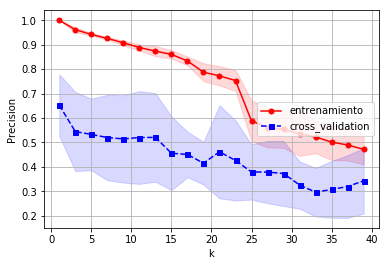

In [0]:
train_scores, cv_scores = validation_curve(neigh, X_train_transformed, y_train, param_name='n_neighbors', param_range=np.arange(1,41,2), cv=5, scoring="accuracy")
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
cv_scores_mean = np.mean(cv_scores, axis=1)
cv_scores_std = np.std(cv_scores, axis=1)

# graficando las curvas
plt.plot(np.arange(1,41,2), train_scores_mean, color='r', marker='o', markersize=5, label='entrenamiento')
plt.fill_between(np.arange(1,41,2), train_scores_mean + train_scores_std, train_scores_mean - train_scores_std, alpha=0.15, color='r')
plt.plot(np.arange(1,41,2), cv_scores_mean, color='b', linestyle='--', marker='s', markersize=5, label='cross_validation')
plt.fill_between(np.arange(1,41,2), cv_scores_mean + cv_scores_std, cv_scores_mean - cv_scores_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('k')
plt.ylabel('Precision')
plt.show()

## Árbol de decision

# Visualización de la salida Outcome predicha

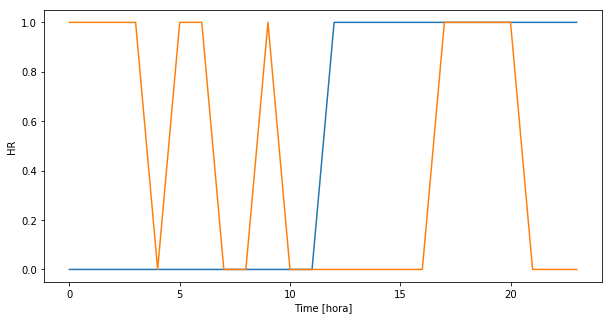

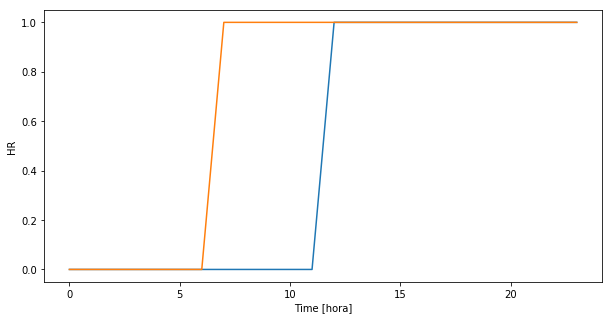

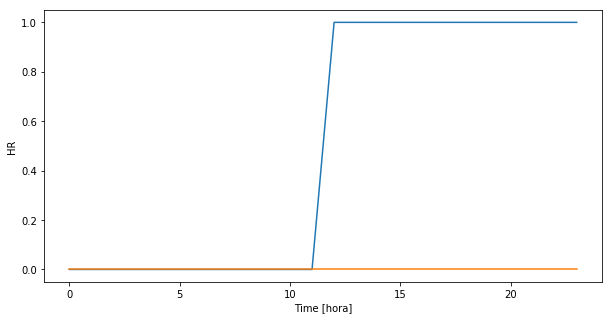

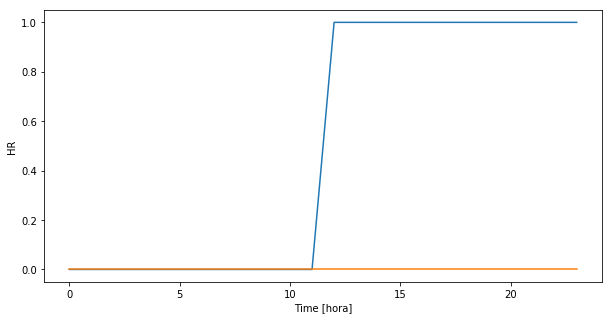

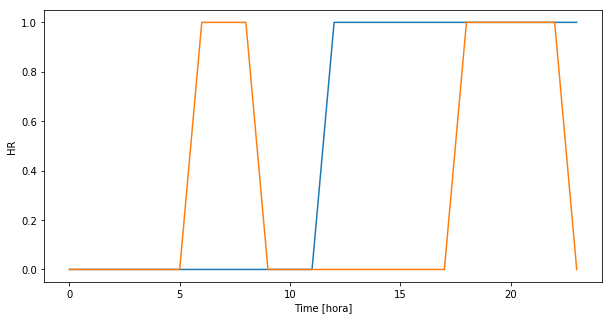

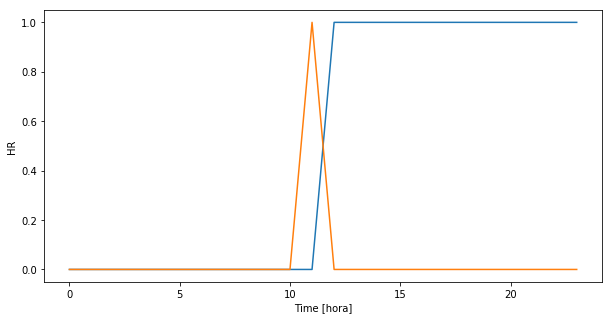

In [26]:
a=-24
b=0
for i in range(len(X_test_transformed)/24):
    a+=24
    b+=24
    paciente_real=y_test[a:b]
    paciente_predicted=pred_neigh[a:b]
    t = np.arange(0,len(paciente_real))
    plt.figure(figsize=(10,5))
    plt.plot(t,paciente_real)
    plt.plot(t,paciente_predicted)
    plt.xlabel('Time [hora]')
    plt.ylabel('HR')
    